<a href="https://colab.research.google.com/github/mehdihatami1998/MachineLearning/blob/main/03_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)
X.shape

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


(10, 1)

In [13]:
print(y)
y.shape

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


(10,)

Since our training set has a very limited number of rows, and if we divide our dataset into training set and test set, we might lose some information, we don't divide the dataset in this project.

## Training the Linear Regression model on the whole dataset

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [32]:
# to implement Polynomial Regression we would make a matrix of different powers of our feature matrix first
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

# now we should create a matrix including the position levels, and different powers of position levels
X_poly = poly_reg.fit_transform(X)

# now we should train another linear model with the matrix above
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) 

LinearRegression()

In [33]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

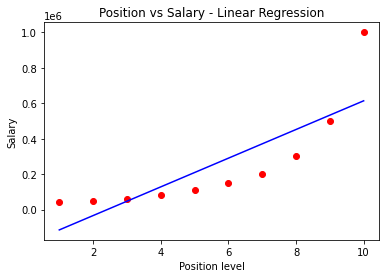

In [40]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Position vs Salary - Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

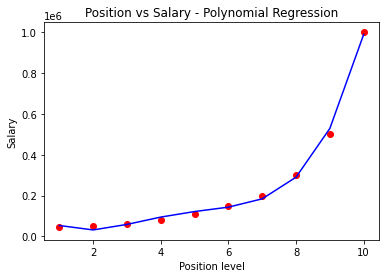

In [38]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Position vs Salary - Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

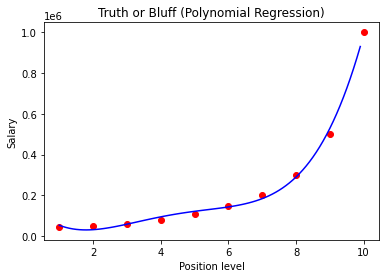

In [42]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [44]:
# now we can make the prediction with Linear Regression for someone with 6.5 years experience
# the input to our model should be a 2D array, so we put 6.5 in double brackets
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [49]:
# the polynomial regression model expect as an input a  
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])